## Part4 Regression models with Random Forest

* https://github.com/dataprofessor/bioinformatics_freecodecamp/blob/main/CDD_ML_Part_4_Acetylcholinesterase_Regression_Random_Forest.ipynb
* https://youtu.be/jBlTQjcKuaY?t=3719

In [18]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('./data/06_bioactivity_data_3class_pubchem_fp.csv')

### Preparing features
#### Input features

In [4]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
115,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
116,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Output features

In [5]:
Y = df.pIC50
Y

0      4.869666
1      4.882397
2      6.008774
3      6.022276
4      4.950782
         ...   
113    4.974694
114    4.995679
115    4.939302
116    4.970616
117    4.102923
Name: pIC50, Length: 118, dtype: float64

In [6]:
X.shape

(118, 881)

In [7]:
Y.shape

(118,)

#### Remove low variance feature

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(118, 197)

### Data split (80/20)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((94, 197), (94,))

In [13]:
X_test.shape, Y_test.shape

((24, 197), (24,))

### Building a Regression model using Random Forest

In [16]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.015844391313310613

In [17]:
Y_pred = model.predict(X_test)

### Scatter plot of experimental vs predicted pIC50 values

<function matplotlib.pyplot.show(close=None, block=None)>

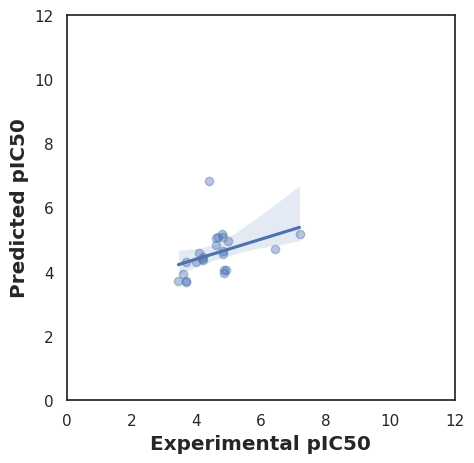

In [20]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x= Y_test, y= Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show